In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Specify the path to your dataset
# dataset_path = 'C:/Users/saksh/Downloads/archive (1)/PlantVillage'

# # Specify the paths for the new split datasets
# train_path = 'C:/Users/saksh/Downloads/archive (1)/train_path'
# val_path = 'C:/Users/saksh/Downloads/archive (1)/val_path'
# test_path = 'C:/Users/saksh/Downloads/archive (1)/test_path'

# # Iterate through each class folder in the original dataset
# for class_folder in os.listdir(dataset_path):
#     class_path = os.path.join(dataset_path, class_folder)

#     # Split the images for each class into training, validation, and test sets
#     train_images, test_images = train_test_split(
#         os.listdir(class_path),
#         test_size=0.2,
#         random_state=42
#     )

#     val_images, test_images = train_test_split(
#         test_images,
#         test_size=0.5,
#         random_state=42
#     )
  
    
#     # Copy images to the appropriate directories
#     for img in train_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(train_path, class_folder, img))

#     for img in val_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(val_path, class_folder, img))

#     for img in test_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(test_path, class_folder, img))


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data_dir = 'C:/Users/Downloads/x/archive (1)/train_path'
validation_data_dir = 'C:/Users/Downloads/x/archive (1)/val_path'
test_data_dir = 'C:/Users/Downloads/x/archive (1)/test_path'

In [5]:
image_height, image_width = 256,256
batch_size = 256
num_classes = 15

In [6]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 16504 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


In [7]:
(train_generator[0][1])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [8]:
# Calculate class weights
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

In [9]:
class_weights

array([1.38051025, 0.93085166, 1.37533333, 1.37533333, 9.09311295,
       0.64683519, 1.37533333, 0.72054137, 1.44581691, 0.77702448,
       0.82109453, 0.9797566 , 0.4287867 , 3.69217002, 0.86498952])

In [10]:
class_weights_dict = dict(enumerate(class_weights))

In [11]:
class_weights_dict

{0: 1.3805102467586783,
 1: 0.9308516638465877,
 2: 1.3753333333333333,
 3: 1.3753333333333333,
 4: 9.093112947658403,
 5: 0.6468351949833432,
 6: 1.3753333333333333,
 7: 0.7205413665138616,
 8: 1.4458169075777485,
 9: 0.7770244821092279,
 10: 0.8210945273631841,
 11: 0.9797566043336302,
 12: 0.42878669784359574,
 13: 3.6921700223713647,
 14: 0.8649895178197065}

In [15]:
# model = Sequential()

# # Convolutional layers
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))



# # Flatten the feature maps to feed into the dense layers
# model.add(Flatten())

# # Dense layers

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))  # Optional dropout for regularization

# # Output layer
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [88]:
# model.fit(
#     train_generator,
#     epochs=10,
#     validation_data=validation_generator,
#     class_weight=class_weights_dict
# )

Epoch 1/10
65/65 [==============================] - 818s 12s/step - loss: 2.5682 - accuracy: 0.1281 - val_loss: 2.0253 - val_accuracy: 0.3217
Epoch 2/10
65/65 [==============================] - 1204s 19s/step - loss: 2.0545 - accuracy: 0.3323 - val_loss: 1.3476 - val_accuracy: 0.5528
Epoch 3/10
65/65 [==============================] - 1242s 19s/step - loss: 1.6345 - accuracy: 0.4610 - val_loss: 1.1577 - val_accuracy: 0.6080
Epoch 4/10
65/65 [==============================] - 1232s 19s/step - loss: 1.3569 - accuracy: 0.5427 - val_loss: 1.1245 - val_accuracy: 0.6003
Epoch 5/10
65/65 [==============================] - 1233s 19s/step - loss: 1.2114 - accuracy: 0.5900 - val_loss: 0.9636 - val_accuracy: 0.6526
Epoch 6/10
65/65 [==============================] - 1232s 19s/step - loss: 1.0743 - accuracy: 0.6286 - val_loss: 0.8769 - val_accuracy: 0.6986
Epoch 7/10
65/65 [==============================] - 1237s 19s/step - loss: 1.0007 - accuracy: 0.6494 - val_loss: 0.7220 - val_accuracy: 0.7330


In [89]:
# model.fit(
#     train_generator,
#     epochs=15,
#     validation_data=validation_generator,
#     class_weight=class_weights_dict
# )

Epoch 1/15
65/65 [==============================] - 1239s 19s/step - loss: 0.7639 - accuracy: 0.7300 - val_loss: 0.5235 - val_accuracy: 0.8077
Epoch 2/15
65/65 [==============================] - 1231s 19s/step - loss: 0.7651 - accuracy: 0.7286 - val_loss: 0.5727 - val_accuracy: 0.8101
Epoch 3/15
65/65 [==============================] - 1242s 19s/step - loss: 0.6922 - accuracy: 0.7545 - val_loss: 0.6334 - val_accuracy: 0.7868
Epoch 4/15
65/65 [==============================] - 1248s 19s/step - loss: 0.6766 - accuracy: 0.7602 - val_loss: 0.5019 - val_accuracy: 0.8314
Epoch 5/15
65/65 [==============================] - 1238s 19s/step - loss: 0.6167 - accuracy: 0.7783 - val_loss: 0.7851 - val_accuracy: 0.7607
Epoch 6/15
65/65 [==============================] - 1256s 19s/step - loss: 0.6308 - accuracy: 0.7785 - val_loss: 0.5192 - val_accuracy: 0.8149
Epoch 7/15
65/65 [==============================] - 1248s 19s/step - loss: 0.5861 - accuracy: 0.7920 - val_loss: 0.8983 - val_accuracy: 0.7442

In [91]:
# model.fit(
#     train_generator,
#     epochs=5,
#     validation_data=validation_generator,
#     class_weight=class_weights_dict
# )

Epoch 1/5
65/65 [==============================] - 775s 12s/step - loss: 0.3961 - accuracy: 0.8565 - val_loss: 0.3650 - val_accuracy: 0.8735
Epoch 2/5
65/65 [==============================] - 723s 11s/step - loss: 0.3895 - accuracy: 0.8599 - val_loss: 0.2444 - val_accuracy: 0.9123
Epoch 3/5
65/65 [==============================] - 714s 11s/step - loss: 0.3627 - accuracy: 0.8642 - val_loss: 0.2862 - val_accuracy: 0.9084
Epoch 4/5
65/65 [==============================] - 713s 11s/step - loss: 0.3964 - accuracy: 0.8560 - val_loss: 0.6829 - val_accuracy: 0.8324
Epoch 5/5
65/65 [==============================] - 713s 11s/step - loss: 0.3442 - accuracy: 0.8763 - val_loss: 0.3135 - val_accuracy: 0.9002


In [92]:
# model.evaluate(test_generator)

9/9 [==============================] - 23s 2s/step - loss: 0.4257 - accuracy: 0.8870


[0.42567670345306396, 0.886956512928009]

In [119]:
# from tensorflow.keras.models import model_from_json
# model_json = model.to_json()
# with open('model1.json','w') as json:
#     json.write(model_json)
# model.save_weights('model1.h5')

In [17]:
from tensorflow.keras.models import model_from_json
model1 = model_from_json(open("model1.json", "r").read())
model1.load_weights('model1.h5')
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Testing accuracy")
model1.evaluate(test_generator) 

Testing accuracy
9/9 [==============================] - 43s 4s/step - loss: 0.4257 - accuracy: 0.8870


[0.42567670345306396, 0.886956512928009]

1/1 [==============================] - 0s 470ms/step
Predicted class =  Tomato_Bacterial_spot
Actual class =  Tomato_Bacterial_spot


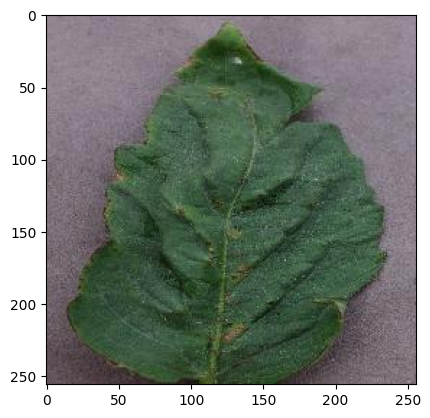

In [18]:
import random
idx = random.randint(0, 2069)
i=int(idx/256)
j=idx-(i*256)
test=(test_generator[i][0][j])

plt.imshow(test)

y_pred=model1.predict((test).reshape(1,256,256,3))
y_real=test_generator[i][1][j]

pred_lab = np.argmax(y_pred[0])
real_lab =np.argmax(y_real)

labels =['Pepper__bell___Bacterial_spot', 
         'Pepper__bell___healthy',
         'Potato___Late_blight',
         'Potato___Early_blight',
         'Potato___healthy',
         'Tomato_Bacterial_spot',
         'Tomato_Early_blight',
         'Tomato_Late_blight',
         'Tomato_Leaf_Mold',
         'Tomato_Septoria_leaf_spot',
         'Tomato_Spider_mites_Two_spotted_spider_mite',
         'Tomato__Target_Spot',
         'Tomato__Tomato_YellowLeaf__Curl_Virus',
         'Tomato__Tomato_mosaic_virus',
         'Tomato_healthy']

print("Predicted class = ",labels[pred_lab])
print("Actual class = ",labels[real_lab])

